**Autor:** Felipe Moreira Sallazar 

**Contato:** sallazarfelipe@gmail.com

**Vídeo de explicação:** [Inteligência Artificial - Aprendizado de Máquina Supervisionado](https://youtu.be/cqa1JKYOi24)

**Problema:**

Este trabalho consiste na execução e validação do algoritmo de aprendizado supervisionado para classificação (árvore de decisão) estudado na disciplina, com o uso de classes e funções disponíveis em bibliotecas Python e descritas neste documento.

O conjunto de dado pode ser selecionado de repositórios públicos como [UCI](http://archive.ics.uci.edu/ml/), site da ferramenta [Weka](http://www.cs.waikato.ac.nz/ml/weka/) ou [kaggle](https://www.kaggle.com/datasets). Conjuntos de dados do pacote sklearn.datasets NÃO podem ser usados.


**Exercício:**

As etapas que devem ser executadas e relatadas são:

• Selecionar conjunto de dados adequado para problemas de classificação (conjunto com classes nominais) e ler o conjunto de dados no formato .csv com a função read.csv(...) (biblioteca Pandas);

• Separar o conjunto de dados em matriz de atributos (X) e vetor de classes (y).

• Transformar os atributos nominais em binários (se existirem), já que a implementação de Árvore de decisão do scikit-learn não aceita atributos categóricos, usando a classe OneHotEnconder do módulo sklearn.preprocessing ou usando a função get_dummies(...) da biblioteca Pandas;

• Dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste usando a função train_test_split do módulo sklearn.model_selection;

• Aplicar o algoritmo de indução de árvore de decisão no conjunto de treinamento usando a função fit(...) da classe DecisionTreeClassifier do módulo sklearn.tree, com o atributo criterion=’entropy’;

• Gerar a figura da árvore de decisão gerada com a função plot_tree(...) do módulo sklearn.tree;

• Fazer a classificação dos dados de teste usando a função predict(...) da classe DecisionTreeClassifier do módulo sklearn.tree;

• Fazer a avaliação do modelo gerado usando os dados de teste e mostrar os resultados incluindo matriz de confusão, acurácia, precisão, revocação e medida-F, possivelmente usando funções disponíveis no sklearn para cada medida individualmente. Não é permitido usar a função classification_report(...) do modulo sklearn.metrics.

• Todas as etapas acima devem ser definidas em CÉLULAS SEPARADAS e claramente documentadas no próprio notebook.

**[Link](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) da base escolhida**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from ucimlrepo import fetch_ucirepo

# fetch dataset 
dataset = fetch_ucirepo(id=697) 

# Outros dataset interessantes
# Abalone: id=1
# Heart Disease: id=45
# Iris: id=53
# Spambase: id=94
# Predict Students' Dropout and Academic Success: id=697

In [2]:
def print_metrics(y_test:pd.Series, y_pred:np.ndarray):
    """Função que gera a imagem da matriz confuzão no modelo HeatMap e imprime no terminal uma tabela com os parâmetros de Acurácia, Precisão, Revocação e Medida-F para cada target.

    Args:
        y_test (pd.Series): Target Real, resultado conhecido na base
        y_pred (np.ndarray): Target Predito, resultado previsto pela árvore de decisão
    """

    # Coleta dos indices para o HeatMap
    y_test_array = y_test.to_numpy().ravel()
    y_pred_array = y_pred.ravel()
    class_names = np.unique(np.concatenate((y_test_array, y_pred_array)))
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)
    # Converter para DataFrame para evitar problemas com seaborn
    conf_matrix = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

    # Plot do HeatMap
    plt.figure(figsize=(8, 6))
    norm_conf_matrix = np.log1p(conf_matrix)
    sns.heatmap(norm_conf_matrix, annot=conf_matrix, fmt='d', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    

    # Calculo dos parâmetros para Avaliação
    accuracy = accuracy_score(y_test, y_pred)
    # Calculo dos parâmetros individuais 
    precision_per_class = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, zero_division=0)
    # Calculo dos parâmetros gerais ponderados
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    # Concatenização e formatação 
    all_acur = [float(f"{accuracy:.3f}") for i in range(len(f1_per_class))] + [float(f"{accuracy:.3f}")]
    all_prec = [float(f"{i:.3f}") for i in precision_per_class] + [float(f"{precision:.3f}")]
    all_rcal = [float(f"{i:.3f}") for i in recall_per_class] + [float(f"{recall:.3f}")]
    all_medf = [float(f"{i:.3f}") for i in f1_per_class] + [float(f"{f1:.3f}")]
    # Imprime a tabela no terminal
    titles = [str(i) for i in class_names] + ['MP']
    tam = max([len(i) for i in titles] + [5])
    print("          ", end=" ")
    for i in titles: print(f"{i:>{tam+1}}", end=" ")
    print()
    print("Acurácia: ", end=" ")
    for i in all_acur: print(f"{i*100:>{tam}.1f}%", end=" ")
    print()
    print("Precisão: ", end=" ")
    for i in all_prec: print(f"{i*100:>{tam}.1f}%", end=" ")
    print()
    print("Revocação:", end=" ")
    for i in all_rcal: print(f"{i*100:>{tam}.1f}%", end=" ")
    print()
    print("Medida-F: ", end=" ")
    for i in all_medf: print(f"{i*100:>{tam}.1f}%", end=" ")
    print()

In [3]:
# Data (como pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 

df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'Target'}, inplace=True)

# Metadata 
print(dataset.metadata) 
# variable information 
print(df.dtypes)
# Data Frame
df


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
# Transformar atributos nominais em binários (se necessário)

# Filtra os atributos do tipo 'object'
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],  # Apenas colunas categóricas
    remainder='passthrough'                                     # Mantém colunas numéricas inalteradas
)
# Codifica em binário de acordo com o filtro
X_encoded = preprocessor.fit_transform(X)
column_names = [name.split('__', 1)[-1] for name in preprocessor.get_feature_names_out()]
X_encoded = pd.DataFrame(X_encoded, columns=column_names)  # Converte de volta para DataFrame

X_encoded

Index([], dtype='object')


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [5]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_train

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
208,1.0,1.0,1.0,9085.0,1.0,1.0,120.0,1.0,19.0,1.0,...,0.0,0.0,6.0,9.0,5.0,13.400000,0.0,13.9,-0.3,0.79
2389,1.0,39.0,2.0,9238.0,1.0,1.0,110.0,1.0,19.0,1.0,...,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,13.9,-0.3,0.79
565,1.0,39.0,1.0,9670.0,1.0,1.0,133.1,1.0,19.0,19.0,...,0.0,0.0,6.0,7.0,6.0,14.714286,0.0,8.9,1.4,3.51
313,1.0,17.0,4.0,9853.0,1.0,1.0,121.0,1.0,38.0,38.0,...,0.0,0.0,6.0,9.0,5.0,13.666667,0.0,9.4,-0.8,-3.12
601,1.0,17.0,5.0,9070.0,1.0,1.0,122.0,1.0,19.0,38.0,...,0.0,0.0,6.0,8.0,4.0,11.600000,0.0,10.8,1.4,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,1.0,2.0,9070.0,1.0,1.0,134.0,1.0,1.0,19.0,...,1.0,0.0,6.0,11.0,4.0,11.333333,0.0,13.9,-0.3,0.79
466,1.0,1.0,1.0,9853.0,1.0,1.0,133.0,1.0,1.0,38.0,...,0.0,4.0,8.0,8.0,8.0,12.625000,0.0,15.5,2.8,-4.06
3092,1.0,1.0,1.0,8014.0,0.0,1.0,100.0,1.0,38.0,19.0,...,0.0,0.0,6.0,6.0,6.0,12.500000,0.0,12.7,3.7,-1.70
3772,1.0,1.0,4.0,9238.0,1.0,1.0,127.0,1.0,1.0,38.0,...,0.0,0.0,6.0,7.0,6.0,13.428571,0.0,11.1,0.6,2.02


In [6]:
# Criar e treinar o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(criterion='entropy', random_state=42 \
                             , ccp_alpha=0.005, max_depth=6)
model = clf.fit(X_train, y_train)

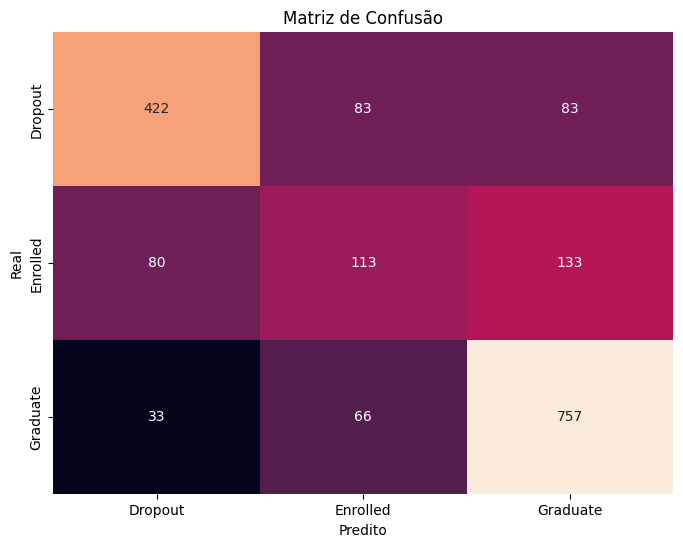

             Dropout  Enrolled  Graduate        MP 
Acurácia:      73.0%     73.0%     73.0%     73.0% 
Precisão:      78.9%     43.1%     77.8%     71.8% 
Revocação:     71.8%     34.7%     88.4%     73.0% 
Medida-F:      75.2%     38.4%     82.8%     72.1% 


In [7]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print_metrics(y_test, y_pred)


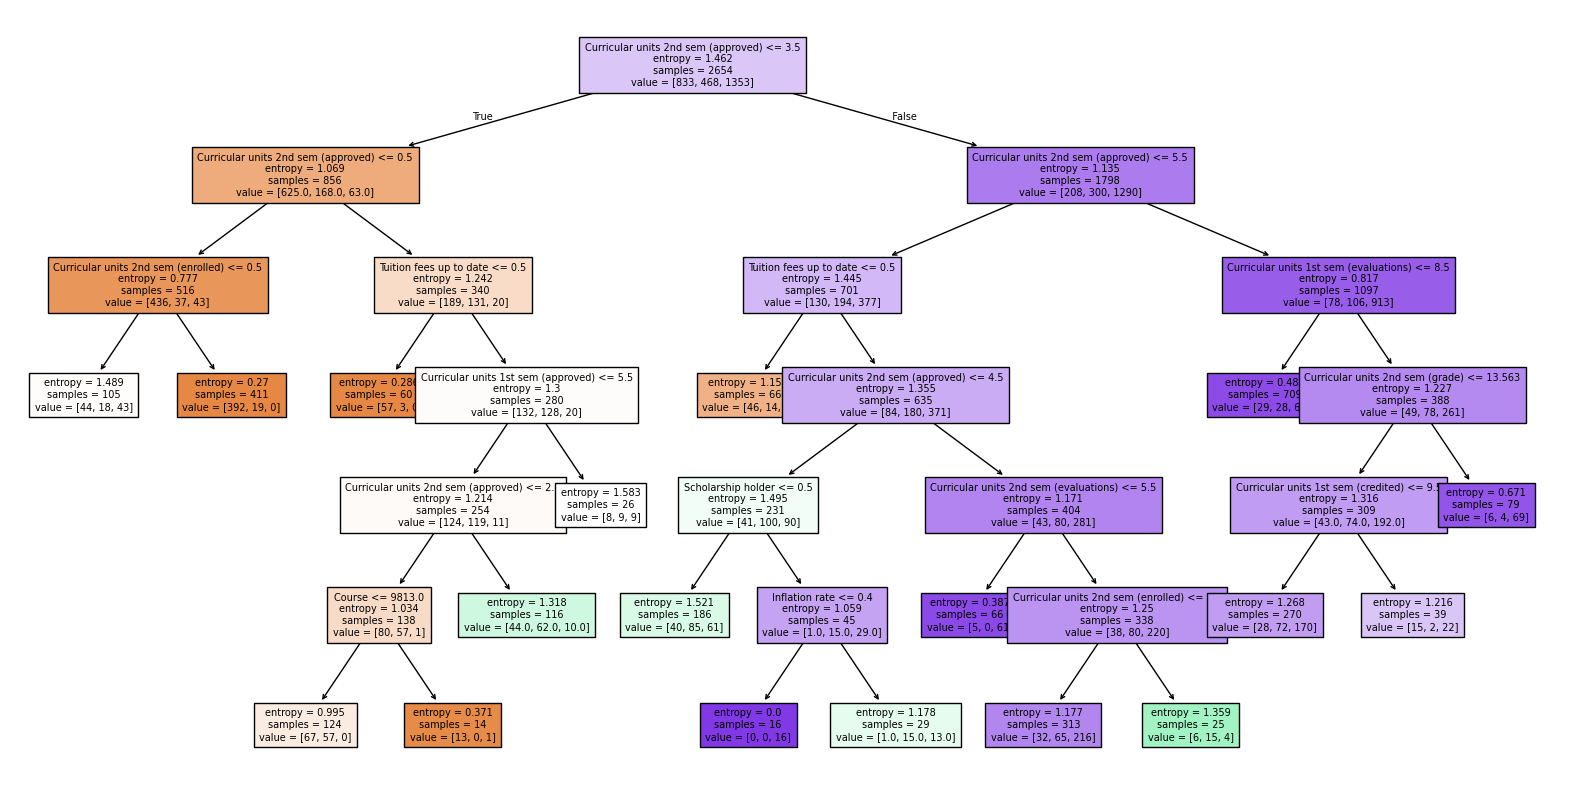

In [8]:
# Criar a árvore de decisão completa
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=column_names, fontsize=7)
plt.show()